In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from datetime import datetime
import pytz

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32663.4961 - val_loss: 32216.8691
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32459.7969 - val_loss: 31965.2891
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31951.4668 - val_loss: 31663.0059
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31721.8164 - val_loss: 31302.8223
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31351.3750 - val_loss: 30895.2090
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30968.9160 - val_loss: 30443.7598
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30482.4805 - val_loss: 29924.9434
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29762.2812 - val_loss: 29354.1699
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29387.2363 - val_loss: 28722.4004
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28466.1816 - val_loss: 28031.4160
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27532.6465 - val_loss: 27284.50

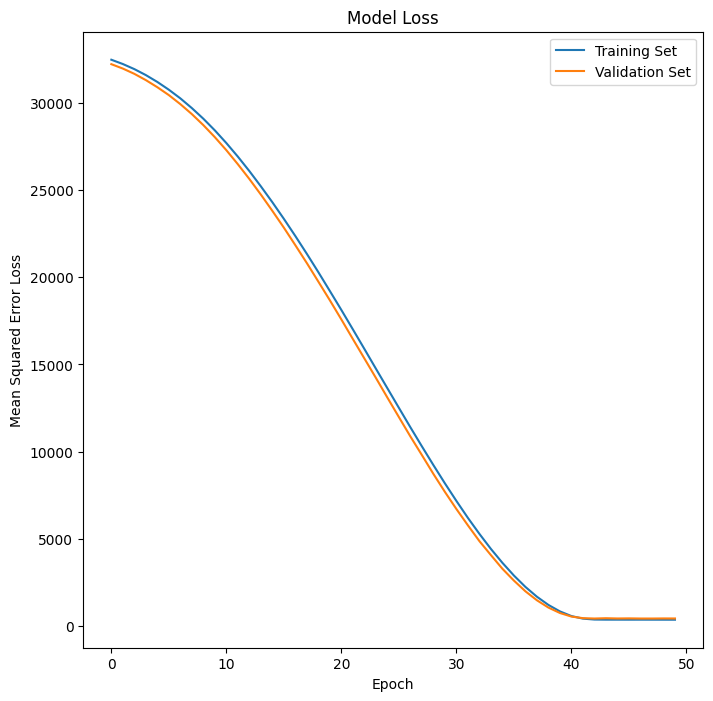

In [44]:
# DNN-16 Model without optimizer
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20609.5059 - val_loss: 1747.3484
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1611.4806 - val_loss: 1040.9974
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 840.4637 - val_loss: 814.1721
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 722.1171 - val_loss: 992.8898
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 695.2277 - val_loss: 956.3629
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 725.0775 - val_loss: 1017.7658
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 733.2971 - val_loss: 609.0791
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670.1702 - val_loss: 742.1830
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790.0659 - val_loss: 863.1546
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 699.6105 - val_loss: 955.2639
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 694.1597 - val_loss: 732.3872
Epoch 12/50
77/77 ━━━━━━

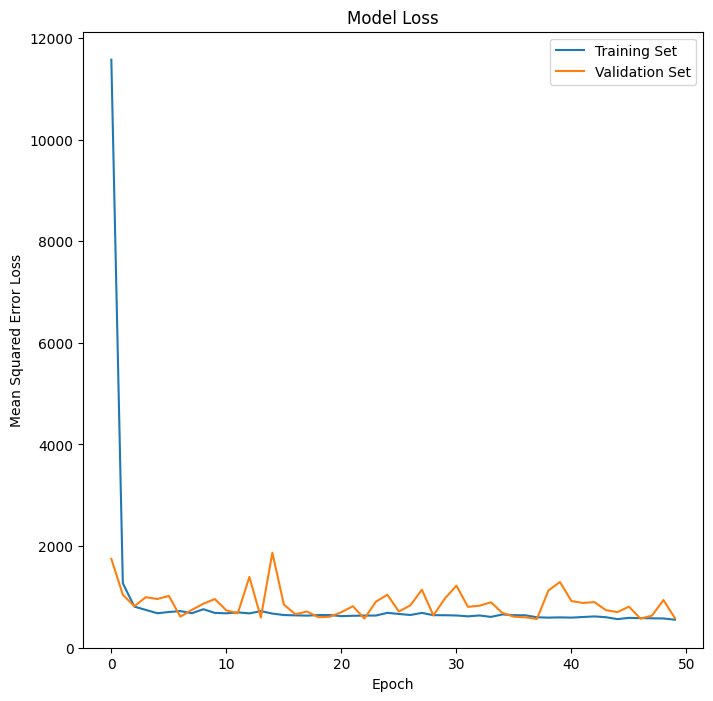

In [2]:
# DNN-16 Model with SGD optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20139.5996 - val_loss: 775.5467
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 573.6196 - val_loss: 597.6545
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 613.5493 - val_loss: 723.3558
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 516.0790 - val_loss: 534.2137
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 511.0786 - val_loss: 585.0042
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 532.3657 - val_loss: 535.3259
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 477.9008 - val_loss: 467.7940
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 436.2137 - val_loss: 631.0139
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 638.2492 - val_loss: 454.0579
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425.9976 - val_loss: 632.0331
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 485.9156 - val_loss: 752.3777
Epoch 12/50
77/77 ━━━━━━━━━━

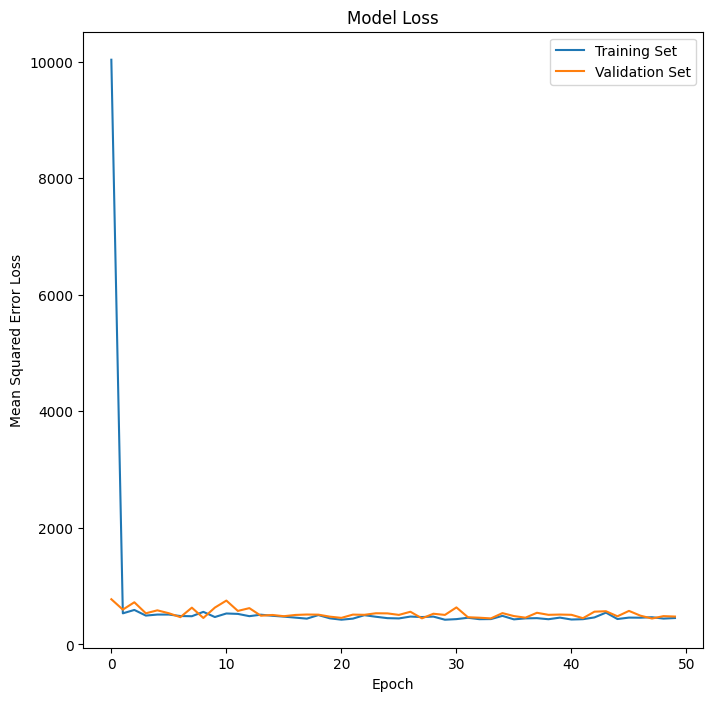

In [43]:
# DNN-16 Model with Adam optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32141.2871 - val_loss: 28339.7480
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27062.4062 - val_loss: 18982.6992
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17832.3711 - val_loss: 8485.4619
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9054.1533 - val_loss: 1557.1309
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6289.5298 - val_loss: 539.2851
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2887.7495 - val_loss: 447.7480
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2409.4197 - val_loss: 472.5300
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1651.5121 - val_loss: 494.7814
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 985.8595 - val_loss: 506.0795
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 910.2442 - val_loss: 540.9280
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 597.9110 - val_loss: 506.7222
Epoch 12/50
77/77 ━━━━━━

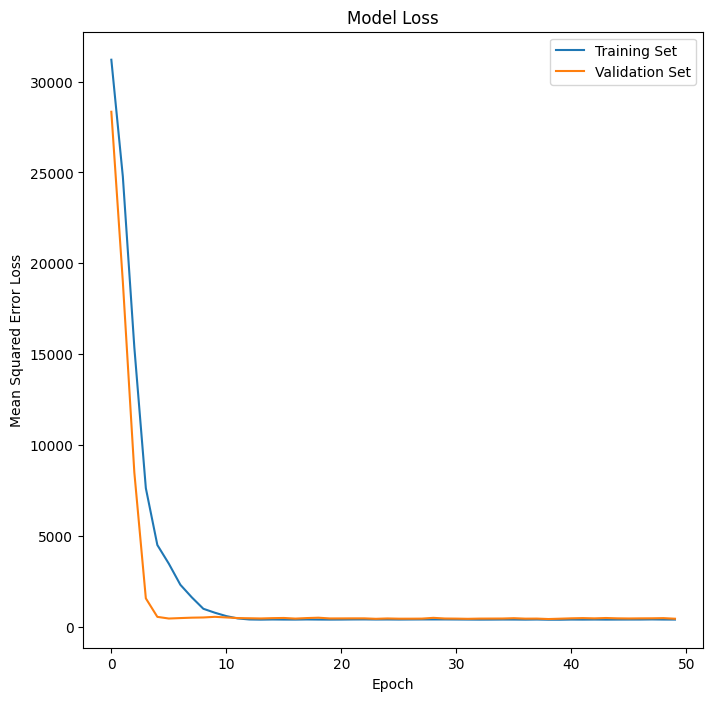

In [3]:
# DNN-16 Model with SGD optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31555.8301 - val_loss: 27575.0820
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24299.6113 - val_loss: 13221.9180
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9735.2910 - val_loss: 2329.5549
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1440.9257 - val_loss: 495.9323
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 409.8088 - val_loss: 439.4611
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364.3660 - val_loss: 446.5217
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 431.3357 - val_loss: 434.2063
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 363.6855 - val_loss: 439.9866
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 354.8884 - val_loss: 466.7125
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 374.3737 - val_loss: 435.8630
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395.9435 - val_loss: 433.8106
Epoch 12/50
77/77 ━━━━━━━━━━━━

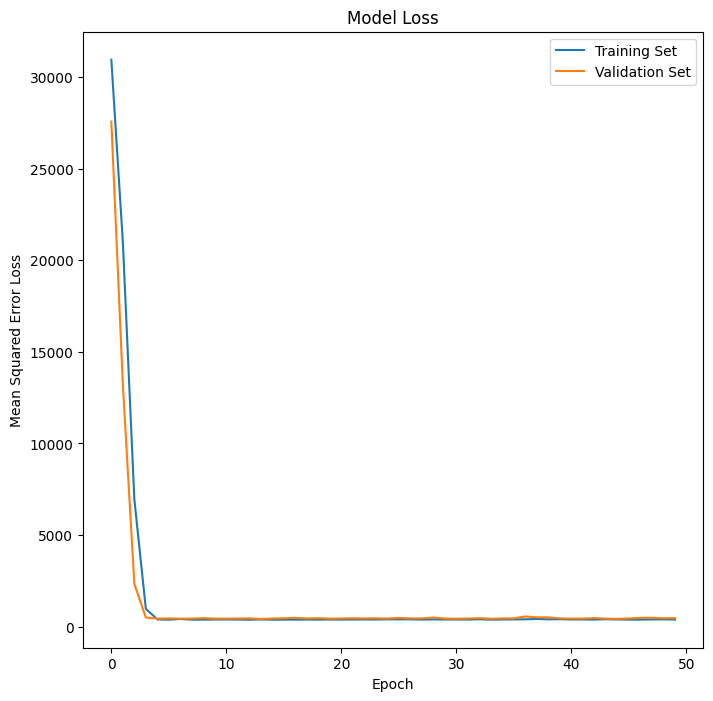

In [36]:
# DNN-16 Model with Adam optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 32901.8945 - val_loss: 32338.5254
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32613.5898 - val_loss: 32120.2812
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32057.9551 - val_loss: 31840.0488
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31880.6973 - val_loss: 31502.8301
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31561.5117 - val_loss: 31104.0918
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30879.6523 - val_loss: 30653.0137
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30763.0547 - val_loss: 30150.2305
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30263.5137 - val_loss: 29597.6777
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29416.9180 - val_loss: 28976.7012
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28966.3828 - val_loss: 28298.8223
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28388.1543 - val_loss: 27575.47

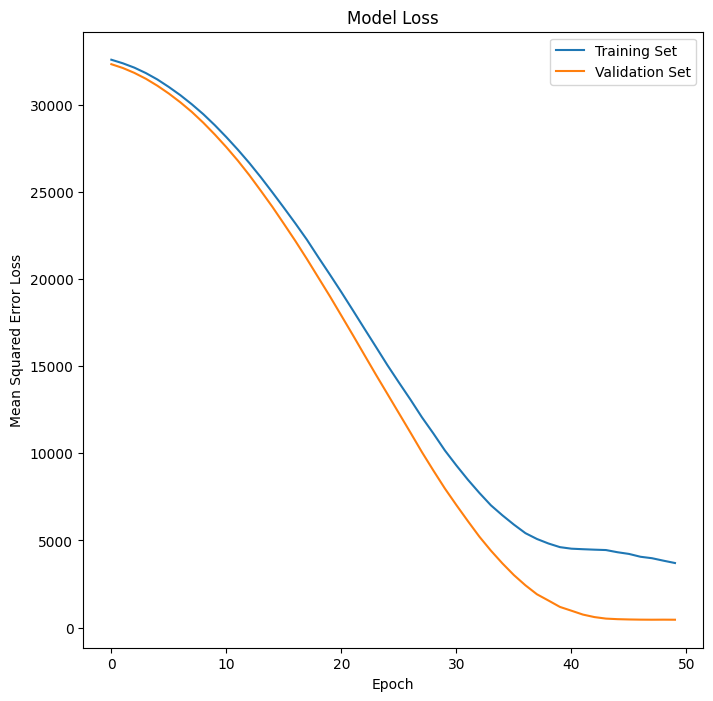

In [4]:
# DNN-16 Model with SGD optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 32789.3203 - val_loss: 32250.6562
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32200.9922 - val_loss: 31988.0000
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31935.9023 - val_loss: 31629.3926
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31496.8984 - val_loss: 31182.9707
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31358.7949 - val_loss: 30626.0391
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30949.1465 - val_loss: 29947.2363
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29826.6367 - val_loss: 29156.2402
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29178.8770 - val_loss: 28229.4004
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28124.2207 - val_loss: 27190.1387
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27175.4336 - val_loss: 26036.2266
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25723.0117 - val_loss: 24785.68

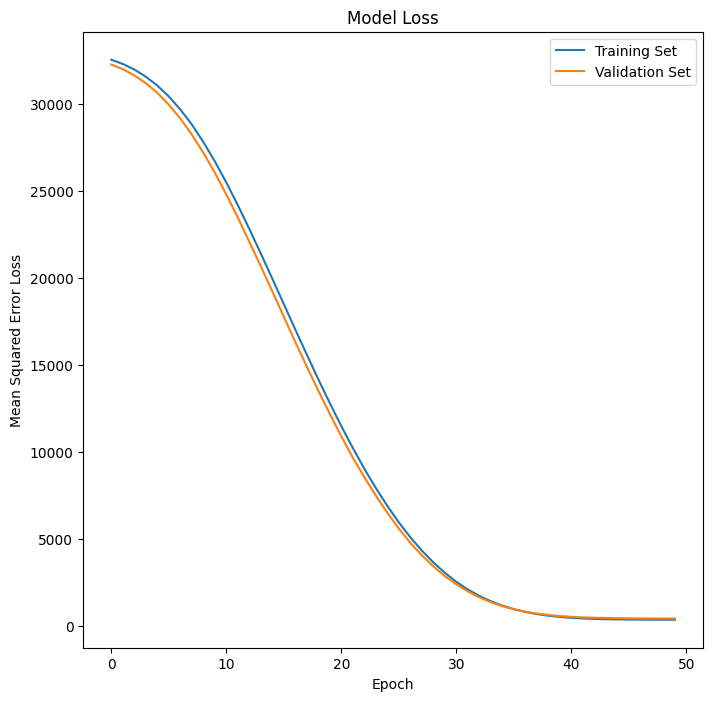

In [37]:
# DNN-16 Model with Adam optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32591.0879 - val_loss: 32492.0723
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32528.5156 - val_loss: 32468.5840
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32385.4375 - val_loss: 32444.0762
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32319.2383 - val_loss: 32419.6328
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32561.8906 - val_loss: 32396.5469
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32536.4102 - val_loss: 32372.5566
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32346.7832 - val_loss: 32348.1797
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32419.8340 - val_loss: 32323.0469
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32594.2051 - val_loss: 32298.8203
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32169.9277 - val_loss: 32274.5117
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32439.7266 - val_loss: 32249.58

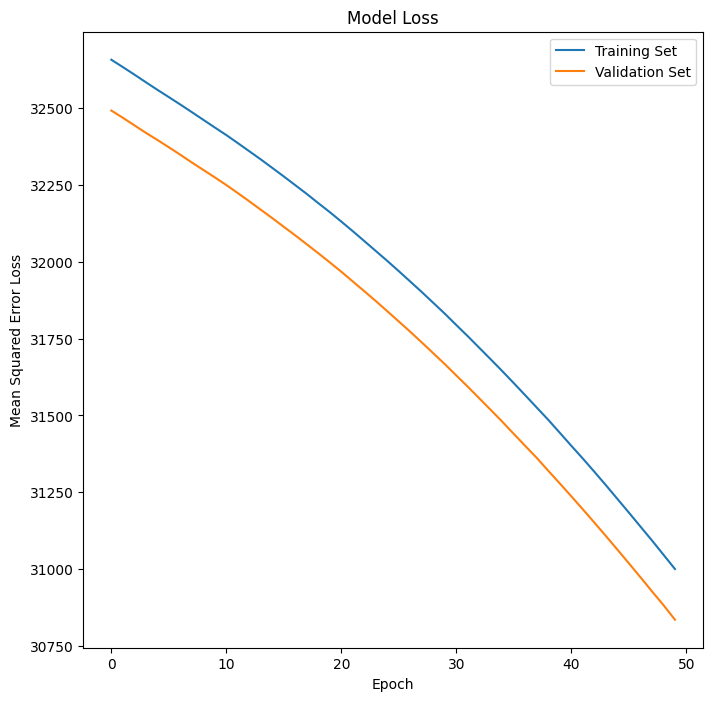

In [5]:
# DNN-16 Model with SGD optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.0001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32355.8770 - val_loss: 32490.7207
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32709.2578 - val_loss: 32471.1934
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32719.2246 - val_loss: 32451.8789
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32619.7832 - val_loss: 32432.9531
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32505.8203 - val_loss: 32413.6270
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32802.4805 - val_loss: 32394.2031
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32768.3438 - val_loss: 32373.9141
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32875.8984 - val_loss: 32354.0781
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32419.3613 - val_loss: 32332.7305
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32690.4062 - val_loss: 32311.4434
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32151.7051 - val_loss: 32289.62

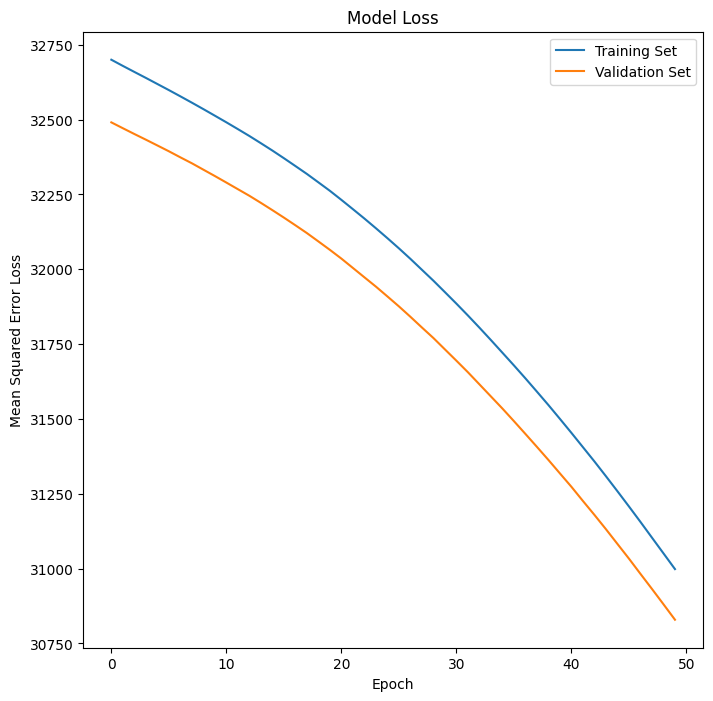

In [38]:
# DNN-16 Model with Adam optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1]))  # First hidden layer with 16 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting on the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()
